In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = {'feature1': [1, 2, 3, 4, 5, 11, 12, 13, 14, 15],
        'feature2': [6, 7, 8, 9, 10, 16, 17, 18, 19, 20],
        'feature3': [11, 12, 13, 14, 15, 21, 22, 23, 24, 25],
        'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']}  # Example groups
df = pd.DataFrame(data)
df


,feature1,feature2,feature3,group
0,1,6,11,A
1,2,7,12,A
2,3,8,13,A
3,4,9,14,A
4,5,10,15,A
5,11,16,21,B
6,12,17,22,B
7,13,18,23,B
8,14,19,24,B
9,15,20,25,B


In [8]:
x = df[['feature1', 'feature2', 'feature3']]
y = df['group']

In [11]:
scaler = StandardScaler().fit_transform(x)
scaler
x_scaled = pd.DataFrame(scaler,  columns=x.columns)
x_scaled

,feature1,feature2,feature3
0,-1.347151,-1.347151,-1.347151
1,-1.154701,-1.154701,-1.154701
2,-0.962250,-0.962250,-0.962250
3,-0.769800,-0.769800,-0.769800
4,-0.577350,-0.577350,-0.577350
5,0.577350,0.577350,0.577350
6,0.769800,0.769800,0.769800
7,0.962250,0.962250,0.962250
8,1.154701,1.154701,1.154701
9,1.347151,1.347151,1.347151


In [12]:
n_components = 2
perplexity = 3
n_iter = 300
tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=42)


In [13]:
x_tsne = tsne.fit_transform(x_scaled)

c:\Users\Jay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [15]:
x_tsne_df = pd.DataFrame(x_tsne, columns=[f'tSNE{i+1}' for i in range(n_components)])
x_tsne_df

,tSNE1,tSNE2
0,-220.903992,0.0
1,-76.148643,0.0
2,-102.570442,0.0
3,24.440638,0.0
4,-134.260208,0.0
5,-5.637790,0.0
6,58.516289,0.0
7,-36.442463,0.0
8,-173.134003,0.0
9,107.475906,0.0


In [18]:
df_final = pd.concat([x_tsne_df, y], axis=1)
df_final

,tSNE1,tSNE2,group
0,-220.903992,0.0,A
1,-76.148643,0.0,A
2,-102.570442,0.0,A
3,24.440638,0.0,A
4,-134.260208,0.0,A
5,-5.637790,0.0,B
6,58.516289,0.0,B
7,-36.442463,0.0,B
8,-173.134003,0.0,B
9,107.475906,0.0,B


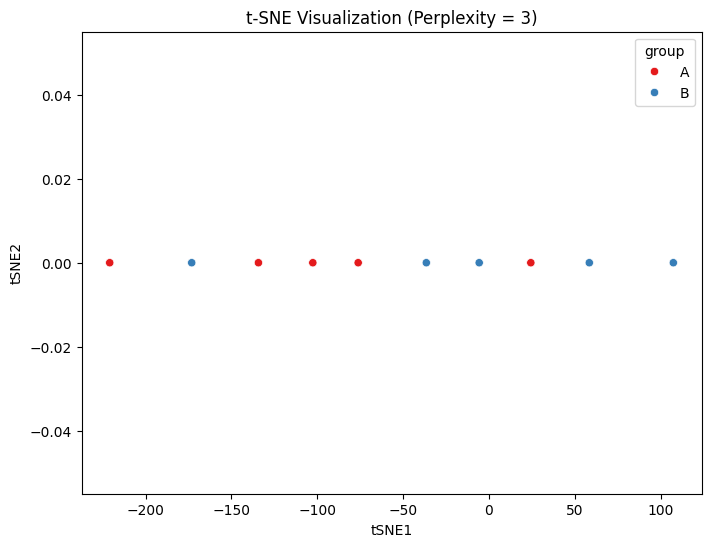

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='group', data=df_final, palette="Set1")  # Use seaborn for nicer plots
plt.title(f't-SNE Visualization (Perplexity = {perplexity})')
plt.show()